<h1 align="center">Face Recogition App</h1>
<h2>Face Detection part</h2>

In [1]:
import  cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras.utils import img_to_array ,load_img
from keras.models import Model 
from keras.preprocessing.image import ImageDataGenerator



below code is for taking 100 photos for training the model.

In [ ]:
cascade = cv.CascadeClassifier("C:/Users/oshanchamara/Documents/ML_projects/FaceRecognition/FaceRecognition/project/classifier/haarcascade.xml")
assert cascade is not None
name = str(input("input your name: "))
videoCapture = cv.VideoCapture(0)
parentDirectory  ='C:/Users/oshanchamara/Documents/ML_projects/FaceRecognition/FaceRecognition/project/dataset'
directory = name
os.chdir('C:/Users/oshanchamara/Documents/ML_projects/FaceRecognition/FaceRecognition/project/dataset')
folders = os.listdir()
if(name not in folders):
    
    path = os.path.join(parentDirectory,directory)
    os.mkdir(path)
else:
    path =os.path.join(parentDirectory,name)

total=0
while videoCapture:
    print(total)
    _,img = videoCapture.read()
    orig = img.copy()
    assert img is not None
    
    key = cv.waitKey(1) & 0xFF
    if (key == ord('q')):
        break
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    faces = cascade.detectMultiScale(gray,1.1,4)
    if key == ord('k'):
        p = os.path.sep.join([path, "{}.png".format(name+"_"+str(total).zfill(5))])
        total+=1
        cv.imwrite(p,orig)
    print("faces detected",len(faces))
    for (x,y,w,h) in faces:
        cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
    cv.imshow("video",img)
videoCapture.release()
cv.destroyAllWindows()

Transfer Learning

In [48]:
from keras.applications import VGG16
model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(150,150,3),    
)
for layers in model.layers:
    layers.trainable=False


In [49]:
top_model = model.output
top_model = tf.keras.layers.Flatten()(top_model)
top_model = tf.keras.layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001))(top_model)
top_model = tf.keras.layers.Dense(128,activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(top_model)
top_model = tf.keras.layers.Dense(3,activation='softmax')(top_model) 
model_new = Model(model.input,top_model)

In [50]:
model_new.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])

In [51]:
model_new.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [44]:
#Call backs for early stopping- used to reduce overfitting
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='loss',#Quantity to be monitored.
    min_delta=0,#Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
    patience=1,#Number of epochs with no improvement after which training will be stopped.
    verbose=1,#Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action.
    mode = 'min', # In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity
    baseline= None, #Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
    restore_best_weights= True 

)

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(128,activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(3,activation='softmax')    
])

In [27]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [23]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])

In [12]:
train_dir = "C:/Users/oshanchamara/Documents/ML_projects/FaceRecognition/FaceRecognition/project/dataset/training"
validation_dir = "C:/Users/oshanchamara/Documents/ML_projects/FaceRecognition/FaceRecognition/project/dataset/validation"
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) 
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 1323 images belonging to 3 classes.
Found 25 images belonging to 3 classes.


In [41]:
#import data set
data_dir = "C:/Users/oshanchamara/Documents/ML_projects/FaceRecognition/FaceRecognition/project/dataset/training"
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(150,150),
    

)
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(150,150),
    
    

)


Found 1323 files belonging to 3 classes.
Using 1059 files for training.
Found 1323 files belonging to 3 classes.
Using 264 files for validation.


In [ ]:
#nly for debugging
import matplotlib.pyplot as plt
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
history = model.fit(train_ds,epochs=10,callbacks=[callbacks],validation_data = val_ds)

In [52]:
history = model_new.fit(train_ds,epochs=10,callbacks=[callbacks],validation_data = val_ds)

Epoch 1/10
34/34 [==============================] - 287s 8s/step - loss: 12.6346 - accuracy: 0.9046 - val_loss: 2.8631 - val_accuracy: 0.9848
Epoch 2/10
34/34 [==============================] - 352s 10s/step - loss: 2.3960 - accuracy: 0.9934 - val_loss: 2.0677 - val_accuracy: 0.9962
Epoch 3/10
34/34 [==============================] - 339s 10s/step - loss: 1.7205 - accuracy: 1.0000 - val_loss: 1.3076 - val_accuracy: 0.9962
Epoch 4/10
34/34 [==============================] - 347s 10s/step - loss: 0.9115 - accuracy: 1.0000 - val_loss: 0.5660 - val_accuracy: 0.9924
Epoch 5/10
34/34 [==============================] - 342s 10s/step - loss: 4.7452 - accuracy: 0.9245 - val_loss: 0.3390 - val_accuracy: 1.0000
Epoch 5: early stopping


OUTPUT 

In [55]:

videoCapture = cv.VideoCapture(0)
font = cv.FONT_HERSHEY_SIMPLEX
while videoCapture:
    _,image = videoCapture.read()
    assert image is not None
    img = cv.resize(image,(150,150),interpolation = cv.INTER_AREA)
    img = np.expand_dims(img, axis=0)
    
    cls = model_new.predict(img)
    print(cls)
    name=""
    if cls[0][0]>0.5:
        name="chamod"
    elif cls[0][1]>0.5:
        name="malith"
    elif cls[0][2]>0.5:
        name="oshan"
    else:
        print("cant identify")
        name='cant identify'
    key = cv.waitKey(1) & 0xFF
    if(key==ord('q')):
        break
    cv.putText(image,name,(50, 50),font, 1,(0, 255, 255),2,cv.LINE_4)
    cv.imshow("video",image)
videoCapture.release()
cv.destroyAllWindows()


1/1 [==============================] - 3s 3s/step
[[1.2315354e-14 5.9918661e-06 9.9999404e-01]]
1/1 [==============================] - 0s 190ms/step
[[4.1556449e-14 1.9187064e-06 9.9999809e-01]]
1/1 [==============================] - 0s 146ms/step
[[7.8218876e-15 8.4536168e-07 9.9999917e-01]]
1/1 [==============================] - 0s 133ms/step
[[9.0383769e-15 1.2022928e-06 9.9999881e-01]]
1/1 [==============================] - 0s 142ms/step
[[1.4846627e-14 4.0617069e-06 9.9999595e-01]]
1/1 [==============================] - 0s 153ms/step
[[5.0694837e-15 2.4197714e-06 9.9999762e-01]]
1/1 [==============================] - 0s 139ms/step
[[2.8855139e-15 8.3987965e-07 9.9999917e-01]]
1/1 [==============================] - 0s 140ms/step
[[2.6440615e-16 1.4358445e-08 1.0000000e+00]]
1/1 [==============================] - 0s 133ms/step
[[4.6460333e-15 4.4777844e-06 9.9999547e-01]]
1/1 [==============================] - 0s 137ms/step
[[2.8103318e-14 1.8490459e-07 9.9999976e-01]]
1/1 [========

In [41]:
#for debugging
import numpy as np
img = load_img("./dataset/validation/oshan/1.jpg", target_size=(150, 150))  # this is a PIL image

x = img_to_array(img)  
x = np.expand_dims(x, axis=0)
cls = model.predict(x)
print(cls)
if cls[0][0]>0.5:
    print("chamod")
elif cls[0][1]>0.5:
    print("malith")
elif cls[0][2]>0.5:
    print("oshan")
else:
    print("cant identify")

1/1 [==============================] - 0s 66ms/step
[[0.04536013 0.00373914 0.9509007 ]]
oshan


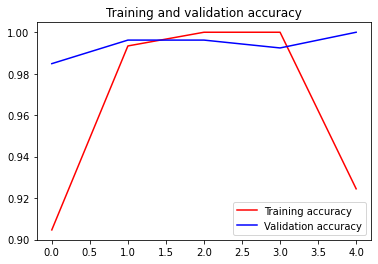

<Figure size 432x288 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()